# Basic PyEnzyme usage

<a target="_blank" href="https://colab.research.google.com/github/EnzymeML/PyEnzyme/blob/main/examples/Basic.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

This notebook demonstrates the basic usage of PyEnzyme:

* Creating an EnzymeML document from scratch
* Enriching metadata through composition and fetchers
* Adding kinetic models and measurements
* Converting to SBML and PeTab

In [ ]:
%pip install pyenzyme

In [1]:
import pyenzyme as pe
import rich  # Used for pretty printing
import matplotlib

matplotlib.use("svg")

## Example: Ethanol degradation

In this example, we want to model the degradation of ethanol based on the Rhea DB entry ([RHEA:25290](https://www.rhea-db.org/rhea/25290)) and the UniProt entry ([P07327](https://www.uniprot.org/uniprotkb/P07327/entry)). Furthermore, we want to add an example measurement.

$$\text{Ethanol} + \text{NAD}^+ \leftrightarrow \text{Acetaldehyde} + \text{NADH} + \text{H}^+$$


**How to do it the EnzymeML way?**

In its most basic form, we can create a fresh EnzymeML document and manually add the information from the Rhea DB entry and the UniProt entry, using a browser. However, this is tedious and potentially error prone, and thus we can utilize the built-in fetchers to do the work for us.

**Sketching our workflow**

1. Initialize an empty EnzymeML document
2. Fetch the information from the Rhea DB entry and the UniProt entry
3. Add the information to the EnzymeML document
4. Add an example measurement
5. Convert the EnzymeML document to SBML and PeTab

In [2]:
# Step 1: Initialize an empty EnzymeML document
enzmldoc = pe.EnzymeMLDocument(name="Ethanol degradation")

# For good practice, we add a vessel to the document
vessel = enzmldoc.add_to_vessels(
    id="v1",
    name="Eppendorf tube",
    volume=10,
    unit="ml",
)

# Lets check the content of the vessel!
rich.print(vessel)

Vessel(
    id='v1',
    name='Eppendorf tube',
    volume=10.0,
    unit=UnitDefinition(
        id='ml',
        name='ml',
        base_units=[BaseUnit(kind=<UnitType.LITRE: 'litre'>, exponent=1, multiplier=1.0, scale=-3.0)]
    ),
    constant=True,
    ld_id='enzml:Vessel/fac38216-5e3d-45db-9454-03fdaf57d8c7',
    ld_type=['enzml:Vessel', 'OBO:OBI_0400081'],
    ld_context={
        'enzml': 'http://www.enzymeml.org/v2/',
        'schema': 'https://schema.org/',
        'OBO': 'http://purl.obolibrary.org/obo/',
        'id': {'@id': 'schema:identifier', '@type': '@id'},
        'name': 'schema:name',
        'volume': 'OBO:OBI_0002139'
    }
)

## Unit handling

You may notice, that the unit of the vessel looks much different than what we have passed. This is because PyEnzyme decomposes the unit into its components utilizing [py-mdmodels](https://github.com/py-mdmodels/py-mdmodels) and [astro-units](https://github.com/astro-units/astro-units) and follows an SBML-like format.

Handling it this way makes unit definitions far more rigorous and precise, while allowing you to simply pass the unit as a string. Any object you'll encounter in PyEnzyme that involves a unit will provide this mechanism. This includes non-trivial composite units like `1/s` or `1/s/mM`.

If you prefer to compose units yourself, simply utilize the `UnitDefinition` and `BaseUnit` classes and pass the container to the corresponding `unit` attribute of the object. However, in most cases, the automatic decomposition is sufficient.

Let's move on to the next step!

## Fetching metadata from databases

While we could manually add the information from the Rhea DB entry and the UniProt entry, we can also utilize the built-in fetchers to do the work for us. These fetchers are designed to consume a string identifier and return the corresponding EnzymeML objects, which we can then add to our document.

This has several advantages over manual addition, including ease of use, consistency, and the ability to reuse the same fetchers for multiple documents. The fetcher will take care to extract all EnzymeML-relevant information from the database entry and add pre-populated objects for you.

The following fetchers are available:

- `fetch_rhea`: Fetch a reaction and its reactants and products from the [Rhea DB](https://www.rhea-db.org/)
- `fetch_uniprot`: Fetch a protein from the [UniProt](https://www.uniprot.org/) database
- `fetch_pdb`: Fetch a protein from the [PDB](https://www.rcsb.org/) database
- `fetch_chebi`: Fetch a small molecule from the [ChEBI](https://www.ebi.ac.uk/chebi/) database
- `fetch_pubchem`: Fetch a small molecule from the [PubChem](https://pubchem.ncbi.nlm.nih.gov/) database

In the following, we will use the fetcher to add the information from the Rhea DB entry and the UniProt entry to our document.

In [3]:
# Step 2: Fetch all the information from the Rhea DB entry and the UniProt entry
reaction, molecules = pe.fetch_rhea("RHEA:25290", vessel_id=vessel.id)
protein = pe.fetch_uniprot("P07327", vessel_id=vessel.id)

# Add the information to the EnzymeML document
enzmldoc.reactions += [reaction]
enzmldoc.small_molecules += molecules
enzmldoc.proteins += [protein]

In [ ]:
# Due to GitHub's rendering we need to disable the interactive summary
# but locally you can enable it by setting `interactive=True` to make
# use of the interactive widgets.
pe.summary(enzmldoc, interactive=False)

📋 EnzymeML Document Summary

╭─ 📄 Document Overview ──────────────────────────────────────────────────────────────────────────────────────────╮
│ Name: Ethanol degradation                                                                                       │
│ Version: 2                                                                                                      │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

    📊 Component Counts                                                                                            
┏━━━━━━━━━━━━━━━━━┳━━━━━━━┓                                                                                        
┃ Component       ┃ Count ┃                                                                                        
┡━━━━━━━━━━━━━━━━━╇━━━━━━━┩                                                                                        
│ Vessels         │     1 │                                                                                        
│ Proteins        │     1 │                                                                                        
│ Complexes       │     0 │                                                                                        
│ Small Molecules │     5 │                                                                                        
│ Reactions       │     1 │                                                                                        
│ Measurements    │     0 │                                                                                        
│ Equations       │     0 │                                                                                        
│ Parameters      │     0 │                                                                                        
└─────────────────┴───────┘                                                                                        
                                                🧬 Species Details                                                 
┏━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Type           ┃ ID                       ┃ Name                     ┃ Details                                  ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Protein        │ alcohol_dehydrogenase_1a │ Alcohol dehydrogenase 1A │ Organism: Homo sapiens | EC: 1.1.1.1 |   │
│                │                          │                          │ Vessel: v1                               │
│ Small Molecule │ ethanol                  │ ethanol                  │ SMILES: CCO... | Vessel: v1              │
│ Small Molecule │ nad_1                    │ NAD(1-)                  │ SMILES: NC(=O)c1ccc(c1)[... | Vessel: v1 │
│ Small Molecule │ acetaldehyde             │ acetaldehyde             │ SMILES: [H]C(C)=O... | Vessel: v1        │
│ Small Molecule │ nadh_2                   │ NADH(2-)                 │ SMILES: NC(=O)C1=CN(C=CC1)[C... |        │
│                │                          │                          │ Vessel: v1                               │
│ Small Molecule │ hydron                   │ hydron                   │ SMILES: [H+]... | Vessel: v1             │
└────────────────┴──────────────────────────┴──────────────────────────┴──────────────────────────────────────────┘

                 🧪 Vessels                 
┏━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓
┃ ID ┃ Name           ┃ Volume  ┃ Constant ┃
┡━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩
│ v1 │ Eppendorf tube │ 10.0 ml │    ✓     │
└────┴────────────────┴─────────┴──────────┘

                                             ⚡ Reactions                                              
┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ ID           ┃ Name                 ┃ Reve

As an alternative to explicitly call each fetcher, you can make use of the `compose` function to which you can provide a list of IDs and the fetcher will be called for each ID. This will result in a complete EnzymeML document.

```python
enzmldoc = pe.compose(
    name="enzmldoc",
    reactions=["RHEA:25290"],
    proteins=["UNIPROT:P00533"],
)
```

### Filtering and extracting objects

We have missed a crucial step the RHEA DB is missing, namely the protein we have just fetched from UniProt. In order to do this, we will use the `filter_xyz` method of the `EnzymeMLDocument` object. This filter function allows you to filter arrays of objects based on their attributes. Hence, we now want to extract the reaction, corresponding to the RHEA ID, and add the protein as a modifier to the reaction.

In [5]:
fetched_reaction = enzmldoc.filter_reactions(id="RHEA:25290")[0]
fetched_reaction.add_to_modifiers(
    species_id=protein.id, role=pe.ModifierRole.BIOCATALYST
)

# Should display the protein as a modifier to the reaction
rich.print(fetched_reaction.modifiers)

[
    ModifierElement(
        species_id='alcohol_dehydrogenase_1a',
        role=<ModifierRole.BIOCATALYST: 'biocatalyst'>,
        ld_id='enzml:ModifierElement/65ef57a1-c7a1-4a29-ad11-b5f81835781c',
        ld_type=['enzml:ModifierElement'],
        ld_context={
            'enzml': 'http://www.enzymeml.org/v2/',
            'schema': 'https://schema.org/',
            'OBO': 'http://purl.obolibrary.org/obo/',
            'species_id': {'@id': 'schema:identifier', '@type': '@id'}
        }
    )
]

## Adding a kinetic model

Now that we have set up the reaction and all accompanying small molecules and proteins, we can now add a kinetic model to the reaction we have just created. PyEnzyme provides a convinient way to parse ASCII equations into an `Equation` object, which can then be added to the reaction. The function also takes care of adding free parameters to the EnzymeML document.

In [9]:
import pyenzyme.equations as peq

# Create the rate law equation
rate_law = peq.build_equation(
    "v_max * ethanol / (K_m + ethanol)",
    enzmldoc=enzmldoc,
    equation_type=pe.EquationType.RATE_LAW,
)

# Lets also add initial values and boundaries for
# subsequent modelling tasks
K_m = enzmldoc.filter_parameters(symbol="K_m")[0]
K_m.initial_value = 80.0
K_m.upper_bound = 200.0
K_m.lower_bound = 20.0

v_max = enzmldoc.filter_parameters(symbol="v_max")[0]
v_max.initial_value = 7.0
v_max.upper_bound = 20.0
v_max.lower_bound = 2.0

# Add the rate law to the reaction
reaction = enzmldoc.filter_reactions(id="RHEA:25290")[0]
reaction.kinetic_law = rate_law

  ENZML	      math	INFO: Parameter K_m already exists in EnzymeMLDocument. Skipping...
  ENZML	      math	INFO: Parameter v_max already exists in EnzymeMLDocument. Skipping...


In [10]:
# Due to GitHub's rendering we need to disable the interactive summary
# but locally you can enable it by setting `interactive=True` to make
# use of the interactive widgets.
pe.summary(enzmldoc, interactive=False)

📋 EnzymeML Document Summary

╭─ 📄 Document Overview ──────────────────────────────────────────────────────────────────────────────────────────╮
│ Name: Ethanol degradation                                                                                       │
│ Version: 2                                                                                                      │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

    📊 Component Counts                                                                                            
┏━━━━━━━━━━━━━━━━━┳━━━━━━━┓                                                                                        
┃ Component       ┃ Count ┃                                                                                        
┡━━━━━━━━━━━━━━━━━╇━━━━━━━┩                                                                                        
│ Vessels         │     1 │                                                                                        
│ Proteins        │     1 │                                                                                        
│ Complexes       │     0 │                                                                                        
│ Small Molecules │     5 │                                                                                        
│ Reactions       │     1 │                                                                                        
│ Measurements    │     5 │                                                                                        
│ Equations       │     0 │                                                                                        
│ Parameters      │     2 │                                                                                        
└─────────────────┴───────┘                                                                                        
                                                🧬 Species Details                                                 
┏━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Type           ┃ ID                       ┃ Name                     ┃ Details                                  ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Protein        │ alcohol_dehydrogenase_1a │ Alcohol dehydrogenase 1A │ Organism: Homo sapiens | EC: 1.1.1.1 |   │
│                │                          │                          │ Vessel: v1                               │
│ Small Molecule │ ethanol                  │ ethanol                  │ SMILES: CCO... | Vessel: v1              │
│ Small Molecule │ nad_1                    │ NAD(1-)                  │ SMILES: NC(=O)c1ccc(c1)[... | Vessel: v1 │
│ Small Molecule │ acetaldehyde             │ acetaldehyde             │ SMILES: [H]C(C)=O... | Vessel: v1        │
│ Small Molecule │ nadh_2                   │ NADH(2-)                 │ SMILES: NC(=O)C1=CN(C=CC1)[C... |        │
│                │                          │                          │ Vessel: v1                               │
│ Small Molecule │ hydron                   │ hydron                   │ SMILES: [H+]... | Vessel: v1             │
└────────────────┴──────────────────────────┴──────────────────────────┴──────────────────────────────────────────┘

                 🧪 Vessels                 
┏━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓
┃ ID ┃ Name           ┃ Volume  ┃ Constant ┃
┡━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩
│ v1 │ Eppendorf tube │ 10.0 ml │    ✓     │
└────┴────────────────┴─────────┴──────────┘

                                              ⚡ Reactions                                              
┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ ID           ┃ Name                 ┃ Re

## Add the measurements to the EnzymeML document

We now want to add measurements to the EnzymeML document. This can be done in multiple ways:

- Directly add the measurements to the EnzymeML document via `enzmldoc.add_to_measurements` or using the `pe.Measurement` class.
- Parse from a CSV file using `pe.from_csv`.
- Parse from a pandas DataFrame using `pe.from_dataframe`.

In the following example we will use the `pe.from_csv` function to parse the measurements from a CSV file. The CSV file `./data/alcohol_degradation.tsv` can be found in the `data` folder. Please note, that the TSV does not encode the time and data units, you must specify them manually. As with all other unit attributes, the unit can be passed as a string or as a `pe.UnitDefinition` object.

The next cell also demonstrates how to visualize the data. Here, you have two options:

- `pe.plot` to create a static plot of all measurements.
- `pe.plot_interactive` to create an interactive Bokeh plot, where you can select individual measurements to be shown and zoom in and out of the data.

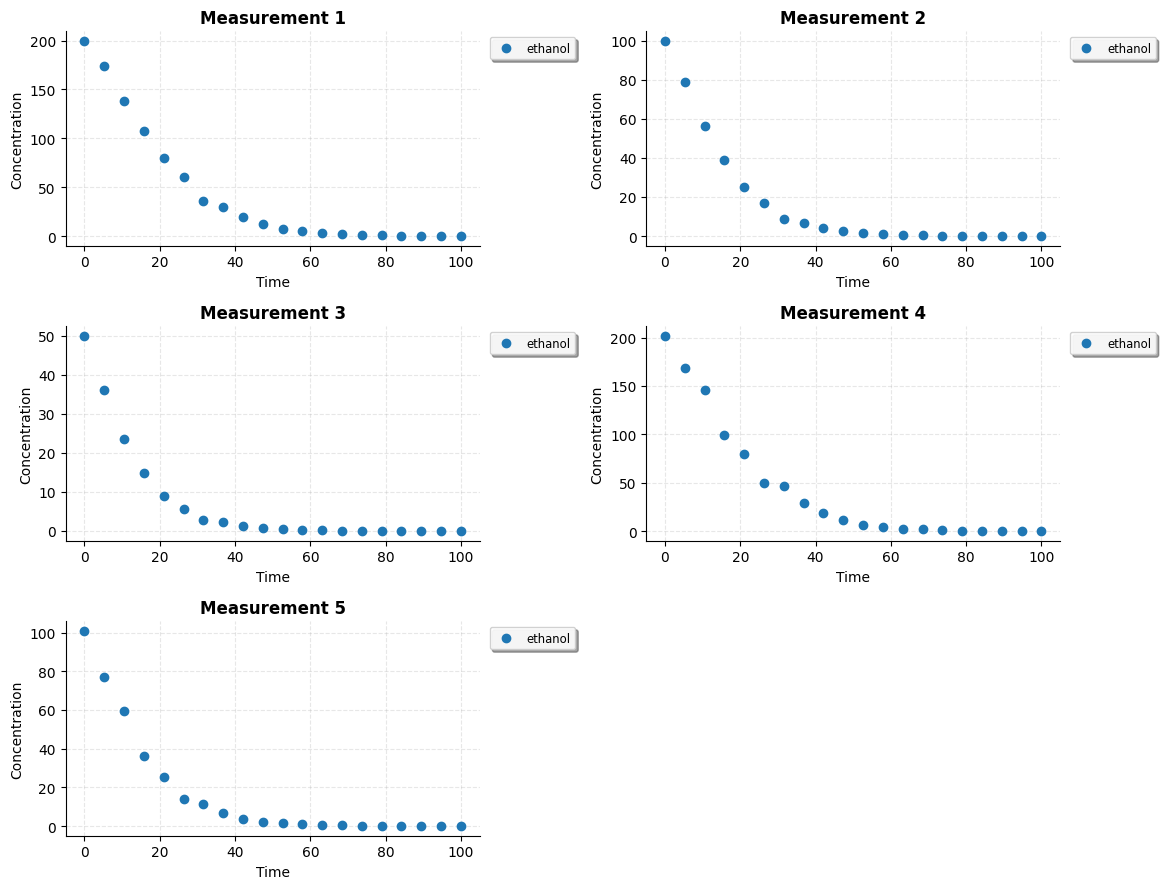


(
    <Figure size 1200x900 with 6 Axes>,
    array([<Axes: title={'center': 'Measurement 1'}, xlabel='Time', ylabel='Concentration'>,
       <Axes: title={'center': 'Measurement 2'}, xlabel='Time', ylabel='Concentration'>,
       <Axes: title={'center': 'Measurement 3'}, xlabel='Time', ylabel='Concentration'>,
       <Axes: title={'center': 'Measurement 4'}, xlabel='Time', ylabel='Concentration'>,
       <Axes: title={'center': 'Measurement 5'}, xlabel='Time', ylabel='Concentration'>,
       <Axes: >], dtype=object)
)

In [7]:
# Directly add the measurements to the EnzymeML document
enzmldoc.measurements += pe.from_csv(
    path="./data/alcohol_degradation.tsv",
    time_unit="min",
    data_unit="mmol/l",
)

# Lets visualize the data
pe.plot(enzmldoc, show=True)

## Exporting the EnzymeML Document

The EnzymeML document can be exported to various standardized formats, each serving different purposes in the computational biology ecosystem:

- **JSON-LD**: A linked data format that preserves the semantic structure and metadata of the EnzymeML document, making it suitable for data exchange and storage
- **SBML XML**: The Systems Biology Markup Language format, widely used for representing biochemical reaction networks and compatible with most modeling tools
- **OMEX**: The Open Modeling EXchange format that bundles the SBML model with associated metadata and files into a single archive
- **PEtab**: A standardized format for parameter estimation problems that includes the model, experimental data, and parameter bounds - ideal for model fitting workflows

In [8]:
# Serialize to JSON-LD
pe.write_enzymeml(enzmldoc, path="outputs/enzmldoc.jsonld")

# Serialize to SBML XML string
sbmldoc, _ = pe.to_sbml(enzmldoc)
with open("outputs/ethanol_degradation.xml", "w") as f:
    f.write(sbmldoc)

# Serialize to OMEX
pe.to_sbml(enzmldoc, path="outputs/ethanol_degradation.omex")

# Serialize to peTab
pe.to_petab(enzmldoc, path="./outputs/petab")

EnzymeML document written to outputs/enzmldoc.jsonld

  SBML	validation	WARNING: Parameter with id 'K_m' should ideally have a unit defined.
  SBML	validation	WARNING: Parameter with id 'v_max' should ideally have a unit defined.
  SBML	validation	WARNING: Parameter with id 'K_m' should ideally have a unit defined.
  SBML	validation	WARNING: Parameter with id 'v_max' should ideally have a unit defined.
  SBML	serializer	WARNING: The SBML document has warnings that should be checked. Set the `warnings` argument to true to see them.


WARNING  Existing omex is overwritten: 'outputs/ethanol_degradation.omex'                               ]8;id=76724;file:///Users/janrange/anaconda3/envs/pyenzyme/lib/python3.13/site-packages/pymetadata/omex.py\omex.py]8;;\:]8;id=7558;file:///Users/janrange/anaconda3/envs/pyenzyme/lib/python3.13/site-packages/pymetadata/omex.py#681\681]8;;\

  SBML	serializer	INFO: OMEX archive written to outputs/ethanol_degradation.omex
  SBML	validation	WARNING: Parameter with id 'K_m' should ideally have a unit defined.
  SBML	validation	WARNING: Parameter with id 'v_max' should ideally have a unit defined.



PEtab(
    format_version=1,
    parameter_file=PosixPath('outputs/petab/ethanol_degradation_parameters.tsv'),
    problems=[
        Problem(
            sbml_files=[PosixPath('outputs/petab/ethanol_degradation_model.xml')],
            measurement_files=[PosixPath('outputs/petab/ethanol_degradation_measurements.tsv')],
            condition_files=[PosixPath('outputs/petab/ethanol_degradation_conditions.tsv')],
            observable_files=[PosixPath('outputs/petab/ethanol_degradation_observables.tsv')],
            visualization_files=None
        )
    ]
)